# Re-weight marks of OMR responses

by [T. Kam](https://phantomachine.github.io/)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Purpose:

1. Import OMR scanner report - (``input.xlsx`` file)

2. Match/compare and convert ``string`` data in table of OMR Report (responses with green/pink or CORRECT/WRONG table)

3. Export to new ``output.xlsx`` file

## Specify file path(s) and names

In [2]:
# Users can modify this!

# Source file
source_name = "ECON9101_MCQ_GRADED_07062024"
file_source = source_name + ".xlsx"

# Target output file
file_out = source_name + "-reweighted" + ".xlsx"
stats_out = source_name + "-reweighted-stats" + ".xlsx"

# Specify your question weights / scores
weights = [5, 5, 5, 5, 5, 5, 10, 2, 2, 6]

# What stats would you like to report?
stat_au_choix = [np.mean, np.median, np.std, min, max]  

## Import OMR report (xlsx format)

In [3]:
# See file_source for where the table row begins!
start_row = 5

# Import as dataframe
df = pd.read_excel(file_source, 
                   sheet_name="Student Response Report", 
                   header=start_row)

In [4]:
# Quick peek 
df.head()

,UNum,Total,Percent,Grade,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,Answer Key,10.0,NaN,NaN,D,B,D,B,C,B,A,B,D,B
1,1234567,8.0,80.0,B,D,B,D,B,A,B,B,B,D,B
2,1234568,3.0,30.0,F,B,B,B,A,D,B,C,B,C,D
3,1234569,8.0,80.0,B,B,B,D,B,C,B,C,B,D,B
4,1234570,8.0,80.0,B,B,B,D,B,C,B,C,B,D,B


In [5]:
# Another look-see
df.tail()

,UNum,Total,Percent,Grade,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
83,1234649,8.000000,80.000000,B,B,B,D,B,C,B,C,B,D,B
84,1234650,5.000000,50.000000,F,D,B,A,B,C,A,B,C,B,B
85,1234651,6.000000,60.000000,D,B,B,D,B,D,C,C,B,D,B
86,1234652,8.000000,80.000000,B,D,B,D,B,D,B,A,B,D,D
87,Mean,6.209302,62.093023,D,51.162791,88.372093,56.976744,94.186047,39.534884,55.813953,9.302326,76.744186,77.906977,70.930233


## Clone, clean, set index to ``UNum``

In [6]:
# Clone to new dataframe dg, drop last row (Mean)
dg = df.copy()
dg.drop(dg.index[-1], inplace=True)

In [7]:
# Inspect key names
dg.keys()

Index(['UNum', 'Total', 'Percent', 'Grade', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
       'Q7', 'Q8', 'Q9', 'Q10'],
      dtype='object')

In [8]:
dg = dg.drop(["Total", "Percent", "Grade"], axis=1)

In [9]:
# Set series "UNum" as index
dg = dg.set_index('UNum')
dg

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
UNum,,,,,,,,,,
Answer Key,D,B,D,B,C,B,A,B,D,B
1234567,D,B,D,B,A,B,B,B,D,B
1234568,B,B,B,A,D,B,C,B,C,D
1234569,B,B,D,B,C,B,C,B,D,B
1234570,B,B,D,B,C,B,C,B,D,B
...,...,...,...,...,...,...,...,...,...,...
1234648,B,D,B,B,C,B,B,C,D,B
1234649,B,B,D,B,C,B,C,B,D,B
1234650,D,B,A,B,C,A,B,C,B,B


## Get ``Answer Key`` and create comparison dataframe ``dt``

In [10]:
dg.loc['Answer Key',:].values

array(['D', 'B', 'D', 'B', 'C', 'B', 'A', 'B', 'D', 'B'], dtype=object)

In [11]:
# make array tiled from Answer Key row
d_testval = np.tile(dg.loc['Answer Key', :].values, (dg.shape[0], 1))
# create test dataframe with values from d_testval
dt = dg.copy()
dt.loc[:, :] = d_testval

In [12]:
dt

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
UNum,,,,,,,,,,
Answer Key,D,B,D,B,C,B,A,B,D,B
1234567,D,B,D,B,C,B,A,B,D,B
1234568,D,B,D,B,C,B,A,B,D,B
1234569,D,B,D,B,C,B,A,B,D,B
1234570,D,B,D,B,C,B,A,B,D,B
...,...,...,...,...,...,...,...,...,...,...
1234648,D,B,D,B,C,B,A,B,D,B
1234649,D,B,D,B,C,B,A,B,D,B
1234650,D,B,D,B,C,B,A,B,D,B


## Equality test (boolean) ``df_bool``

In [13]:
# Test equality between element-wise values of dg and dt
df_bool = dg.eq(dt)
df_bool

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
UNum,,,,,,,,,,
Answer Key,True,True,True,True,True,True,True,True,True,True
1234567,True,True,True,True,False,True,False,True,True,True
1234568,False,True,False,False,False,True,False,True,False,False
1234569,False,True,True,True,True,True,False,True,True,True
1234570,False,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
1234648,False,False,False,True,True,True,False,False,True,True
1234649,False,True,True,True,True,True,False,True,True,True
1234650,True,True,False,True,True,False,False,False,False,True


## Compute re-weighted index based on ``weights`` (user specified)

In [14]:
# Custom weights matrix
W = np.tile(weights, (df_bool.shape[0], 1))

# Generate re-weighted OMR results
df_reweighted = df_bool*W
df_reweighted

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
UNum,,,,,,,,,,
Answer Key,5,5,5,5,5,5,10,2,2,6
1234567,5,5,5,5,0,5,0,2,2,6
1234568,0,5,0,0,0,5,0,2,0,0
1234569,0,5,5,5,5,5,0,2,2,6
1234570,0,5,5,5,5,5,0,2,2,6
...,...,...,...,...,...,...,...,...,...,...
1234648,0,0,0,5,5,5,0,0,2,6
1234649,0,5,5,5,5,5,0,2,2,6
1234650,5,5,0,5,5,0,0,0,0,6


## Write output to Excel

In [15]:
# Some lipstick on this piggy
def pink_or_green(val):
    if val == 0:
        color = 'pink' 
    else:
        color = 'turquoise'
    return 'background-color: %s' % color

Add totals and percentage totals columns:

In [16]:
# Maximal mark that can be earned
max_total = df_reweighted.loc["Answer Key"].sum()

# series: totals
totals = df_reweighted.sum(axis=1)

# series: percentage totals
totals_percent = 100*totals/max_total

In [17]:
# Add new columns
df_reweighted["Total"] = totals
df_reweighted["Percent"] = totals_percent.astype(int)

In [18]:
# Write to excel
df_reweighted.style.applymap(pink_or_green).to_excel(file_out, sheet_name="Scores")

Below is what you should see in the output file:

In [19]:
df_reweighted.style.applymap(pink_or_green)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Total,Percent
UNum,,,,,,,,,,,,
Answer Key,5,5,5,5,5,5,10,2,2,6,50,100
1234567,5,5,5,5,0,5,0,2,2,6,35,70
1234568,0,5,0,0,0,5,0,2,0,0,12,24
1234569,0,5,5,5,5,5,0,2,2,6,35,70
1234570,0,5,5,5,5,5,0,2,2,6,35,70
1234571,0,5,5,5,0,0,0,2,2,6,25,50
1234572,5,0,0,5,5,5,10,0,0,6,36,72
1234573,0,5,5,5,0,0,0,0,2,6,23,46
1234574,0,0,5,5,0,0,0,0,2,0,12,24


## Summary statistics

In [20]:

# Drop answer key (so you don't bias up the stats!)
df_reweighted_nomaster = df_reweighted.drop(index=("Answer Key"))

# Compute basic stats
df_stats = df_reweighted_nomaster.apply(stat_au_choix).round(1)
df_stats

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Total,Percent
mean,2.6,4.4,2.8,4.7,2.0,2.8,0.9,1.5,1.6,4.3,27.6,55.2
median,5.0,5.0,5.0,5.0,0.0,5.0,0.0,2.0,2.0,6.0,28.0,56.0
std,2.5,1.6,2.5,1.2,2.5,2.5,2.9,0.8,0.8,2.7,7.2,14.4
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,24.0
max,5.0,5.0,5.0,5.0,5.0,5.0,10.0,2.0,2.0,6.0,45.0,90.0


In [21]:
# Write to new excel file
df_stats.to_excel(stats_out, sheet_name="Statistics")

## Distribution by question and total

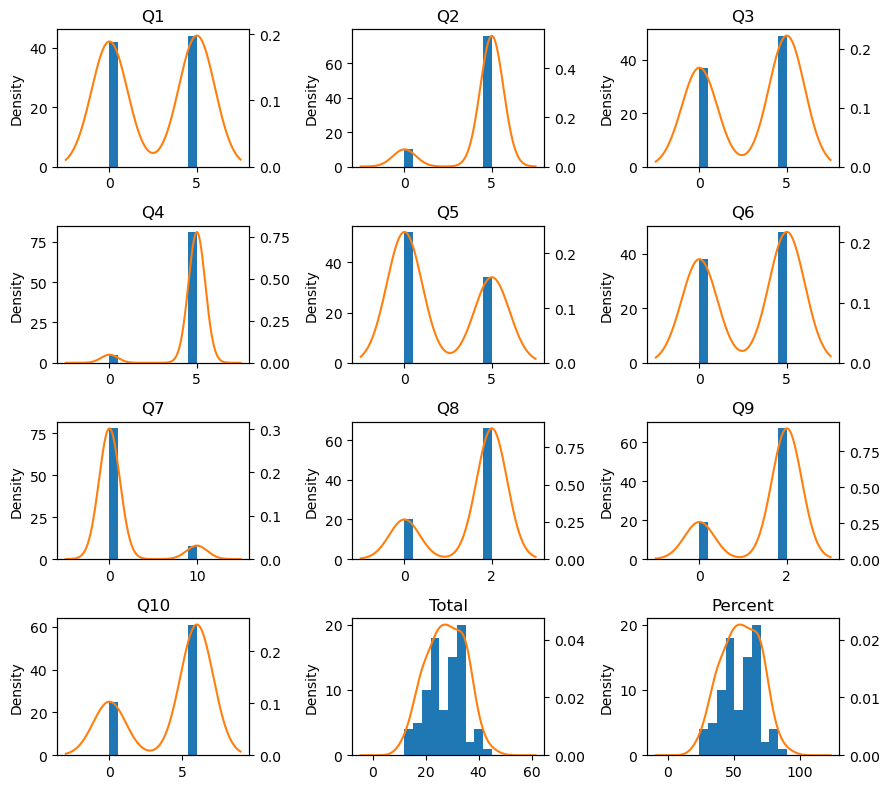

In [22]:
k = len(df_reweighted_nomaster.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 3, m * 2))
for i, (key, series) in enumerate(df_reweighted_nomaster.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    series.hist(ax=ax)
    ax2 = series.plot.kde(ax=ax, secondary_y=True, title=key)
    ax2.set_ylim(0)

fig.tight_layout()

## Kolmogorov-Smirnov test

Use default of null hypothesis that the empirical distribution is identical to a Normal distribution. The alternative is that they are not identical.

In [23]:
# Run K-S test against a normal distro
result = stats.kstest(df_reweighted_nomaster["Total"], 
                                                    stats.norm.cdf)

# Make a dict of tuple, results, parse as pandas df
val = dict(zip(("Test Statistic", "p-value"), result))
df_ks = pd.DataFrame.from_dict(val, orient="index", columns=["value",])

# Message
if df_ks.loc["p-value"].item() <= 0.05:
    print("Reject null of normality!")
else:
    print("Cannot reject null (at 95% confidence): You're normal like all of us!")
    
# Show table
df_ks

Reject null of normality!


,value
Test Statistic,1.0
p-value,0.0
